# Exercise of the book examples

* https://github.com/INVESTAR/StockAnalysisInPython

### [ch3]

##### KOSPI의 MDD 구하기

In [1]:
import pandas as pd
import numpy as np
import glob

In [2]:
from pandas_datareader import data as pdr

In [5]:
import yfinance as yf
yf.pdr_override()

In [6]:
import matplotlib.pyplot as plt

In [7]:
kospi = pdr.get_data_yahoo('^KS11','2004-01-04')

[*********************100%***********************]  1 of 1 completed


In [8]:
kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-05,817.280029,825.429993,816.549988,824.099976,824.099976,408200
2004-01-06,831.260010,831.260010,819.530029,823.429993,823.429993,484000
2004-01-07,826.080017,831.070007,825.229980,827.070007,827.070007,404600
2004-01-08,831.099976,839.280029,824.150024,824.150024,824.150024,428800
2004-01-09,835.419983,849.500000,835.049988,845.270020,845.270020,543200
...,...,...,...,...,...,...
2020-12-23,2737.739990,2769.080078,2716.280029,2759.820068,2759.820068,1121300
2020-12-24,2762.600098,2812.159912,2762.600098,2806.860107,2806.860107,1030900
2020-12-28,2820.949951,2834.590088,2799.560059,2808.600098,2808.600098,1006200


In [9]:
window = 252
peak = kospi['Adj Close'].rolling(window, min_periods=1).max()
drawdown = kospi['Adj Close']/peak - 1.0
max_dd = drawdown.rolling(window, min_periods=1).min()

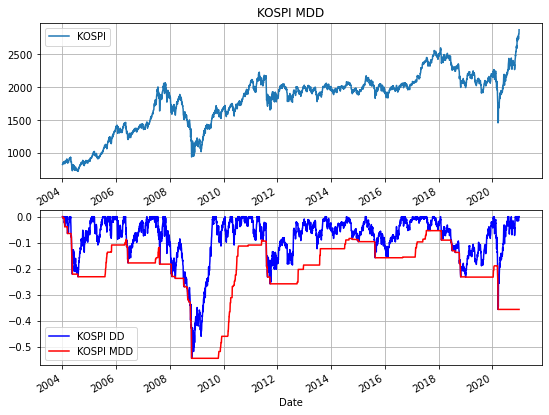

In [13]:
plt.figure(figsize=(9,7))
plt.subplot(211) #2행1열중1행에그린다.
kospi['Close'].plot(label='KOSPI',title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212) #2행1열중2행에 그린다.
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

In [15]:
print(max_dd.min())
print(max_dd[max_dd==-0.5453665130144085])

-0.5453665130144085
Date
2008-10-24   -0.545367
2008-10-27   -0.545367
2008-10-28   -0.545367
2008-10-29   -0.545367
2008-10-30   -0.545367
                ...   
2009-10-16   -0.545367
2009-10-19   -0.545367
2009-10-20   -0.545367
2009-10-21   -0.545367
2009-10-22   -0.545367
Name: Adj Close, Length: 252, dtype: float64


---

##### KOSPI와 다우존스 지수 비교

In [16]:
dow = pdr.get_data_yahoo('^DJI','2000-01-04')
kospi = pdr.get_data_yahoo('^KS11','2000-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


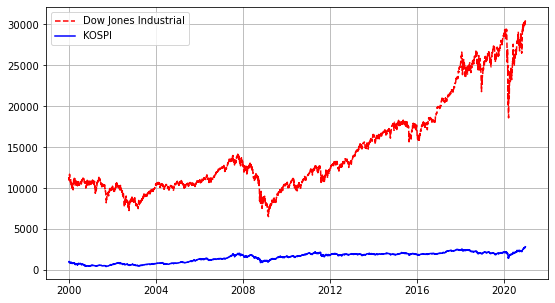

In [18]:
plt.figure(figsize=(9,5))
plt.plot(dow.index, dow.Close, 'r--', label='Dow Jones Industrial')
plt.plot(kospi.index, kospi.Close, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

##### 지수 기준값이 달라서 비교 불가

---

##### 지수화 비교

- 현재 종가를 특정 시점의 종가로 나누어 변동률 구해보자
- 지수화 : ~ 대비 ~의 변동률

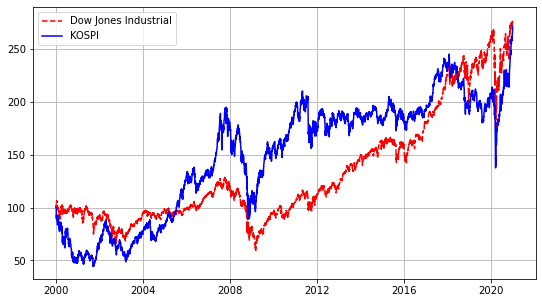

In [21]:
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r--', label='Dow Jones Industrial')
plt.plot(k.index, k, 'b', label='KOSPI')
plt.grid(True)
plt.legend(loc='best')
plt.show()

---

##### 산점도 분석

In [23]:
len(dow), len(kospi)

(5284, 5169)

In [38]:
df = pd.DataFrame({'DOW':dow['Close'], 'KOSPI':kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

In [39]:
df

,DOW,KOSPI
Date,,
2000-01-03,11357.509766,1059.040039
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
...,...,...
2020-12-24,30199.869141,2806.860107
2020-12-28,30403.970703,2808.600098
2020-12-29,30335.669922,2820.510010


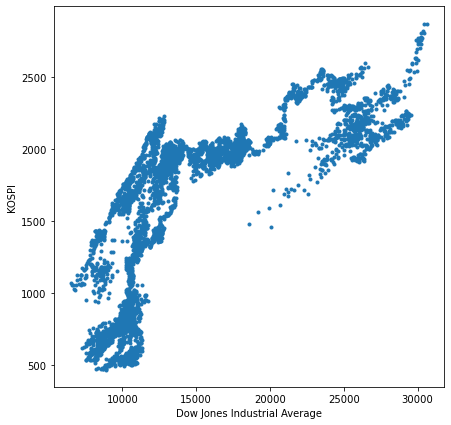

In [40]:
plt.figure(figsize=(7,7))
plt.scatter(df['DOW'],df['KOSPI'],marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

In [42]:
df.corr()

,DOW,KOSPI
DOW,1.000000,0.756934
KOSPI,0.756934,1.000000


---

##### 선형회귀분석

In [45]:
from scipy import stats

In [46]:
regr = stats.linregress(df['DOW'],df['KOSPI'])
regr

LinregressResult(slope=0.07699695076628395, intercept=455.94954158379346, rvalue=0.7569344592791232, pvalue=0.0, stderr=0.0009013535997153001)

In [47]:
regr_line = f'Y = {regr.slope:.2f} * X + {regr.intercept:.2f}'

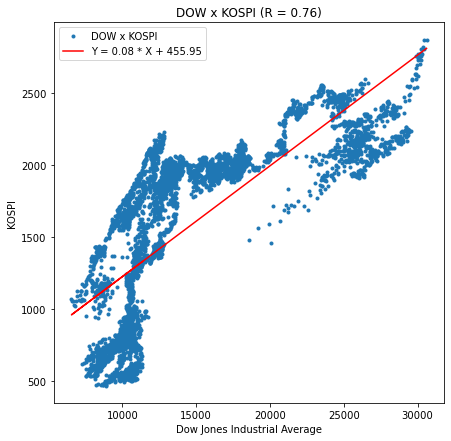

In [49]:
plt.figure(figsize=(7,7))
plt.plot(df.DOW, df.KOSPI, '.')
plt.plot(df.DOW, regr.slope * df.DOW + regr.intercept, 'r')
plt.legend(['DOW x KOSPI', regr_line])
plt.title(f'DOW x KOSPI (R = {regr.rvalue:.2f})')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()

---

### [ch4]

In [50]:
glob.glob('*')

['Exercise.ipynb', '상장법인목록.xls']

In [58]:
krx_list = pd.read_html('상장법인목록.xls')[0]
# pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13')

In [60]:
krx_list.종목코드 = krx_list.종목코드.map('{:06d}'.format)

In [62]:
krx_list.sort_values(by='종목코드')

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
2317,동화약품,000020,의약품 제조업,"의약품 제조,판매,수출입",1976-03-24,12월,박기환,http://www.dong-wha.co.kr,서울특별시
2309,KR모터스,000040,그외 기타 운송장비 제조업,"이륜차(오토바이) 제조,도매",1976-05-25,12월,이기복,http://www.krmotors.com,경상남도
2408,경방,000050,종합 소매업,"섬유류(면사,면혼방사,면직물,면혼방직물,화섬사,화섬직물) 제조,도매,수출입",1956-03-03,12월,"김준, 김담",http://www.kyungbang.co.kr,서울특별시
2407,메리츠화재,000060,보험업,"손해보험(화재,해상,운송보험)",1956-07-02,12월,김용범,http://www.meritzfire.com,서울특별시
2399,삼양홀딩스,000070,기타 금융업,"지주회사,경영자문컨설팅",1968-12-27,12월,윤재엽,http://www.samyang.com,서울특별시
...,...,...,...,...,...,...,...,...,...
385,코오롱티슈진,950160,기초 의약물질 및 생물학적 제제 제조업,골관절염 치료제,2017-11-06,12월,"노문종, 한성수",http://tissuegene.com,미국
345,JTC,950170,종합 소매업,"식품류, 생활용품류, 화장품류 (사후면세업)",2018-04-06,02월,구철모,http://www.groupjtc.com/korean/,일본
221,SNK,950180,소프트웨어 개발 및 공급업,"IP 라이센스, 콘솔, 모바일 게임",2019-05-07,07월,갈지휘,http://www.snk-corp.co.jp,일본
57,미투젠,950190,소프트웨어 개발 및 공급업,"캐주얼게임, 소셜카지노게임",2020-08-18,12월,린즈웨이/라우호밍,http://www.me2zen.com,홍콩


---

### Web Scrapping

In [63]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [64]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=068270&page=1'
with urlopen(url) as doc:
    html = BeautifulSoup(doc,'lxml')
    pgrr = html.find('td',class_='pgRR')
    print(pgrr.a['href'])

/item/sise_day.nhn?code=068270&page=383


In [65]:
pgrr

<td class="pgRR">
<a href="/item/sise_day.nhn?code=068270&amp;page=383">맨뒤
				<img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>
</a>
</td>

In [66]:
pgrr.prettify()

'<td class="pgRR">\n <a href="/item/sise_day.nhn?code=068270&amp;page=383">\n  맨뒤\n  <img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarRR.gif" width="8"/>\n </a>\n</td>\n'

In [68]:
print(pgrr.text)


맨뒤
				




In [70]:
with urlopen(url) as doc:
    html = BeautifulSoup(doc, 'lxml')
    pgrr = html.find('td',class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    print(s)
    last_page = s[-1]
    print(last_page)

['/item/sise_day.nhn?code', '068270&page', '383']
383


In [85]:
%%time
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=068270'

for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url,page)
    df = df.append(pd.read_html(page_url,header=0)[0])
    
df = df.dropna()    

Wall time: 28 s


In [73]:
df.shape

(3823, 7)

In [87]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2020.12.30,359000.0,1500.0,362500.0,365000.0,351000.0,2079327.0
2,2020.12.29,360500.0,33000.0,360500.0,365000.0,347000.0,5725005.0
3,2020.12.28,333500.0,14000.0,349500.0,360000.0,324000.0,7295632.0
4,2020.12.24,347500.0,7500.0,355500.0,358000.0,343500.0,2076258.0
5,2020.12.23,355000.0,4000.0,364000.0,366000.0,354000.0,1425317.0
...,...,...,...,...,...,...,...
12,2005.07.25,5650.0,70.0,5500.0,5950.0,5500.0,61036.0
13,2005.07.22,5580.0,160.0,5850.0,5850.0,5530.0,69921.0
1,2005.07.21,5740.0,810.0,6450.0,6580.0,5730.0,182685.0
2,2005.07.20,6550.0,1150.0,7690.0,7690.0,6550.0,422688.0


##### OHLC 캔들 차트 그리기

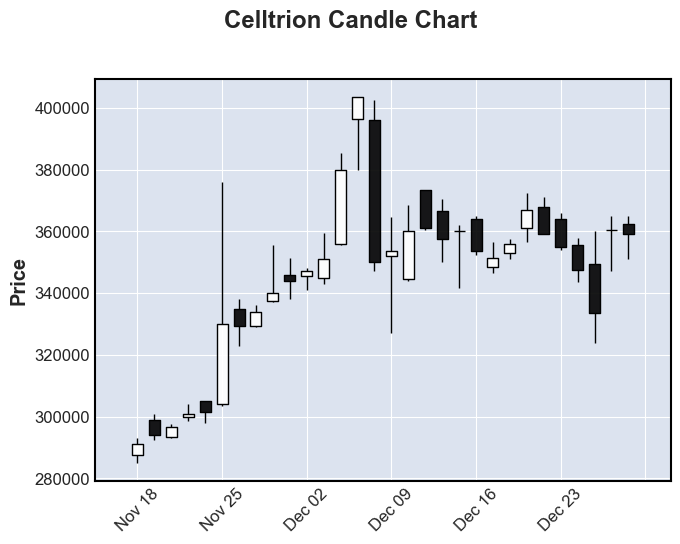

In [88]:
import mplfinance as mpf

df2 = df.iloc[0:30]
df2 = df2.rename(columns={'날짜':'Date','시가':'Open','고가':'High','저가':'Low','종가':'Close','거래량':'Volume'})
df2 = df2.sort_values(by='Date')
df2.index = pd.to_datetime(df2.Date)
df2 = df2[['Open','High','Low','Close','Volume']]

mpf.plot(df2, title='Celltrion Candle Chart',type='candle')

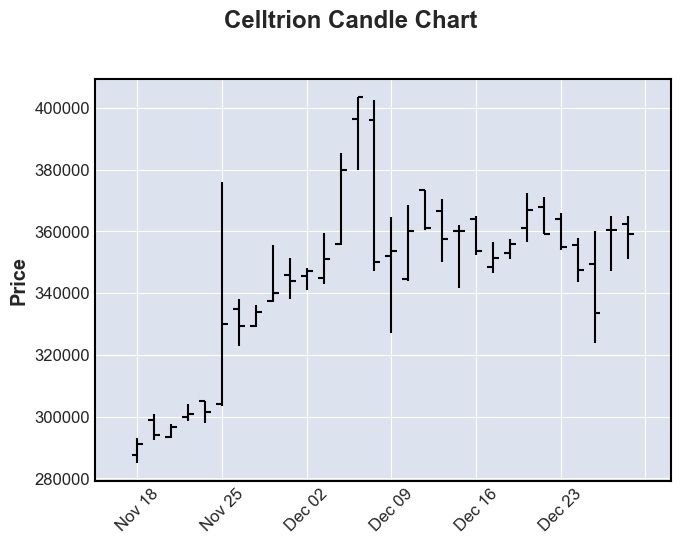

In [78]:
mpf.plot(df2, title='Celltrion Candle Chart',type='ohlc')

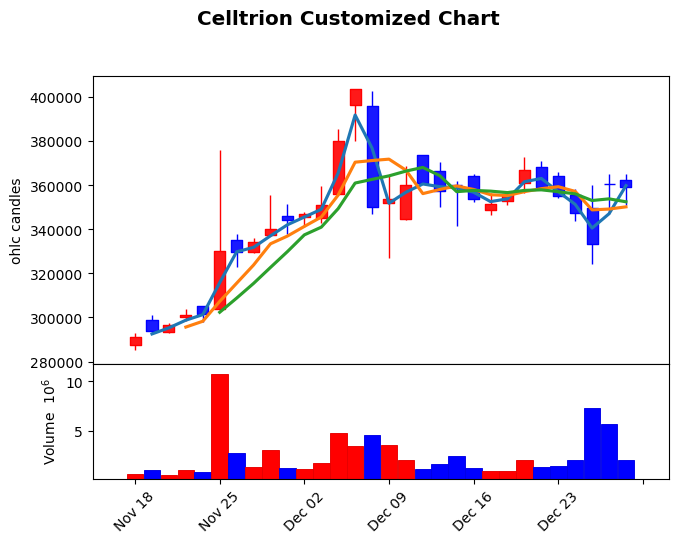

In [89]:
kwargs = dict(title='Celltrion Customized Chart',type='candle',
             mav=(2,4,6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df2, **kwargs, style=s)

github.com/matplotlib/mplfinance


---

#### Testing of Samsung Stock

In [92]:
krx_list[lambda x : x['회사명']=='삼성전자']

,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
2345,삼성전자,005930,통신 및 방송 장비 제조업,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반...",1975-06-11,12월,"김기남, 김현석, 고동진",http://www.sec.co.kr,경기도


In [100]:
%%time
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930'

with urlopen(sise_url) as doc:
    html = BeautifulSoup(doc, 'lxml')
    pgrr = html.find('td',class_='pgRR')
    s = str(pgrr.a['href']).split('=')
    print(s)
    last_page = s[-1]
    print(last_page)

for page in range(1, int(last_page)+1):
    page_url = '{}&page={}'.format(sise_url,page)
    df = df.append(pd.read_html(page_url,header=0)[0])
    
df = df.dropna()    

['/item/sise_day.nhn?code', '005930&page', '617']
617
Wall time: 45.5 s


In [101]:
last_page

'617'

In [102]:
df.shape

(6162, 7)

In [103]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2020.12.30,81000.0,2700.0,77400.0,81300.0,77300.0,29122199.0
2,2020.12.29,78300.0,400.0,78800.0,78900.0,77300.0,30339449.0
3,2020.12.28,78700.0,900.0,79000.0,80100.0,78200.0,40085044.0
4,2020.12.24,77800.0,3900.0,74100.0,78800.0,74000.0,32502870.0
5,2020.12.23,73900.0,1600.0,72400.0,74000.0,72300.0,19411326.0
...,...,...,...,...,...,...,...
11,1996.06.29,68500.0,400.0,68100.0,69100.0,67100.0,96710.0
12,1996.06.28,68100.0,1200.0,67300.0,68500.0,67200.0,138430.0
13,1996.06.27,66900.0,800.0,67500.0,67700.0,66700.0,155450.0
1,1996.06.26,67700.0,200.0,67600.0,67900.0,66000.0,136630.0


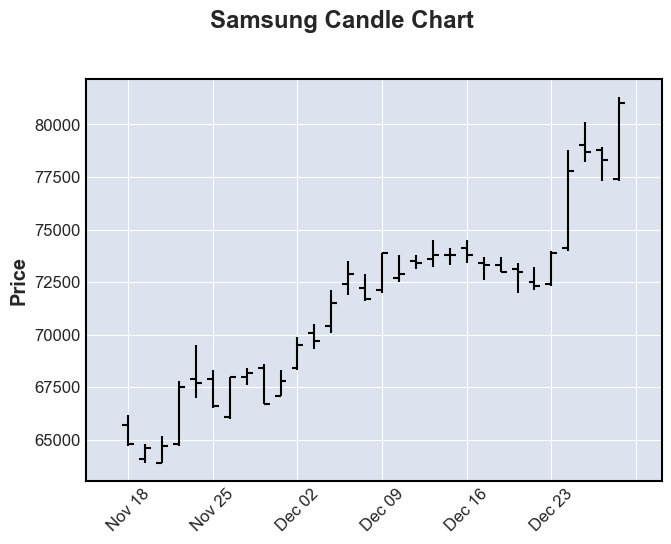

In [106]:
df2 = df.iloc[0:30]
df2 = df2.rename(columns={'날짜':'Date','시가':'Open','고가':'High','저가':'Low','종가':'Close','거래량':'Volume'})
df2 = df2.sort_values(by='Date')
df2.index = pd.to_datetime(df2.Date)
df2 = df2[['Open','High','Low','Close','Volume']]

mpf.plot(df2, title='Samsung Candle Chart',type='ohlc')

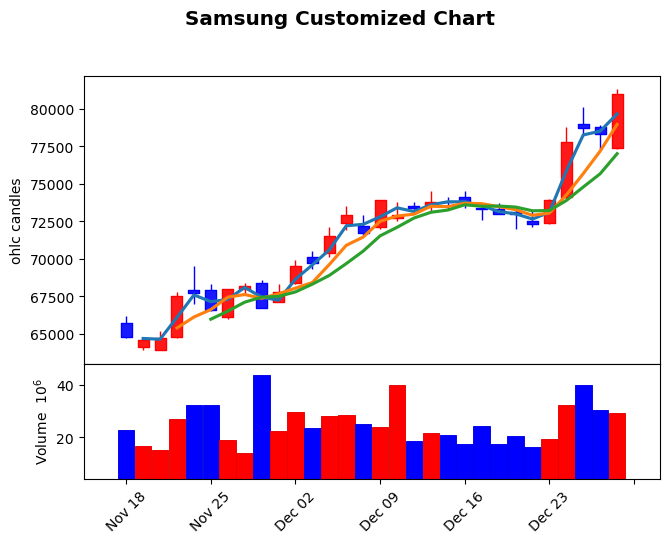

In [105]:
kwargs = dict(title='Samsung Customized Chart',type='candle',
             mav=(2,4,6), volume=True, ylabel='ohlc candles')
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s = mpf.make_mpf_style(marketcolors=mc)
mpf.plot(df2, **kwargs, style=s)

---

### [ch5]

##### 야후 파이낸스 데이터의 무제점

* 한국 주식 종목에 대한 부정확한 과거 데이터 (ex 액면 분할 미반영)

In [3]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


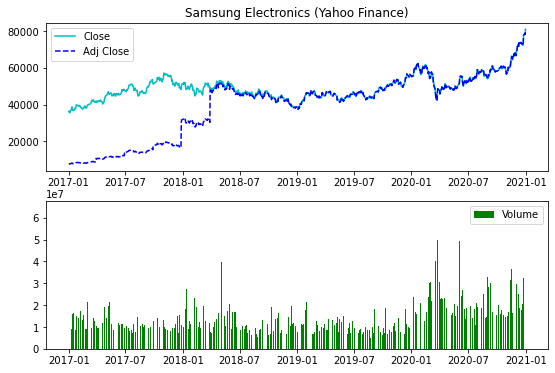

In [4]:
df = pdr.get_data_yahoo('005930.KS','2017-01-01')

plt.figure(figsize=(9,6))
plt.subplot(2,1,1)
plt.title('Samsung Electronics (Yahoo Finance)')
plt.plot(df.index, df['Close'], 'c', label='Close')
plt.plot(df.index, df['Adj Close'], 'b--', label='Adj Close')
plt.legend(loc='best')
plt.subplot(2,1,2)
plt.bar(df.index, df['Volume'], color='g', label='Volume')
plt.legend(loc='best')
plt.show()

---

### MariaDB Connection with Python

In [4]:
import pymysql

In [5]:
connection = pymysql.connect(host='localhost',port=3306, db='INVESTAR',user='root',passwd='tlqkfdk2',autocommit=True)

In [6]:
cursor = connection.cursor()

In [7]:
cursor.execute("SELECT VERSION();")

1

In [8]:
result = cursor.fetchone()

In [10]:
print("MariaDB version : {}".format(result))

MariaDB version : ('10.5.8-MariaDB',)


In [11]:
connection.close()

In [3]:
print('')

In [9]:
df = pd.read_sql("SELECT * FROM company_info",connection)

In [12]:
df.head()

,code,company,last_update
0,000020,동화약품,2021-01-02
1,000040,KR모터스,2021-01-02
2,000050,경방,2021-01-02
3,000060,메리츠화재,2021-01-02
4,000070,삼양홀딩스,2021-01-02


In [13]:
for r in df.head().itertuples():
    print(r)

Pandas(Index=0, code='000020', company='동화약품', last_update=datetime.date(2021, 1, 2))
Pandas(Index=1, code='000040', company='KR모터스', last_update=datetime.date(2021, 1, 2))
Pandas(Index=2, code='000050', company='경방', last_update=datetime.date(2021, 1, 2))
Pandas(Index=3, code='000060', company='메리츠화재', last_update=datetime.date(2021, 1, 2))
Pandas(Index=4, code='000070', company='삼양홀딩스', last_update=datetime.date(2021, 1, 2))


### DB구축은 py파일로

---

In [18]:
df[lambda x : x['company']=='삼성에스디에스']

,code,company,last_update
534,018260,삼성에스디에스,2021-01-02
